<a href="https://colab.research.google.com/github/knowbright/HR-High-Turnover-Solution/blob/main/hr_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [ ]:
dataset = pd.read_excel('/content/gdrive/MyDrive/datafiles/hr_comma_sep.xlsx')

In [ ]:
dataset.shape

(14999, 10)

In [ ]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

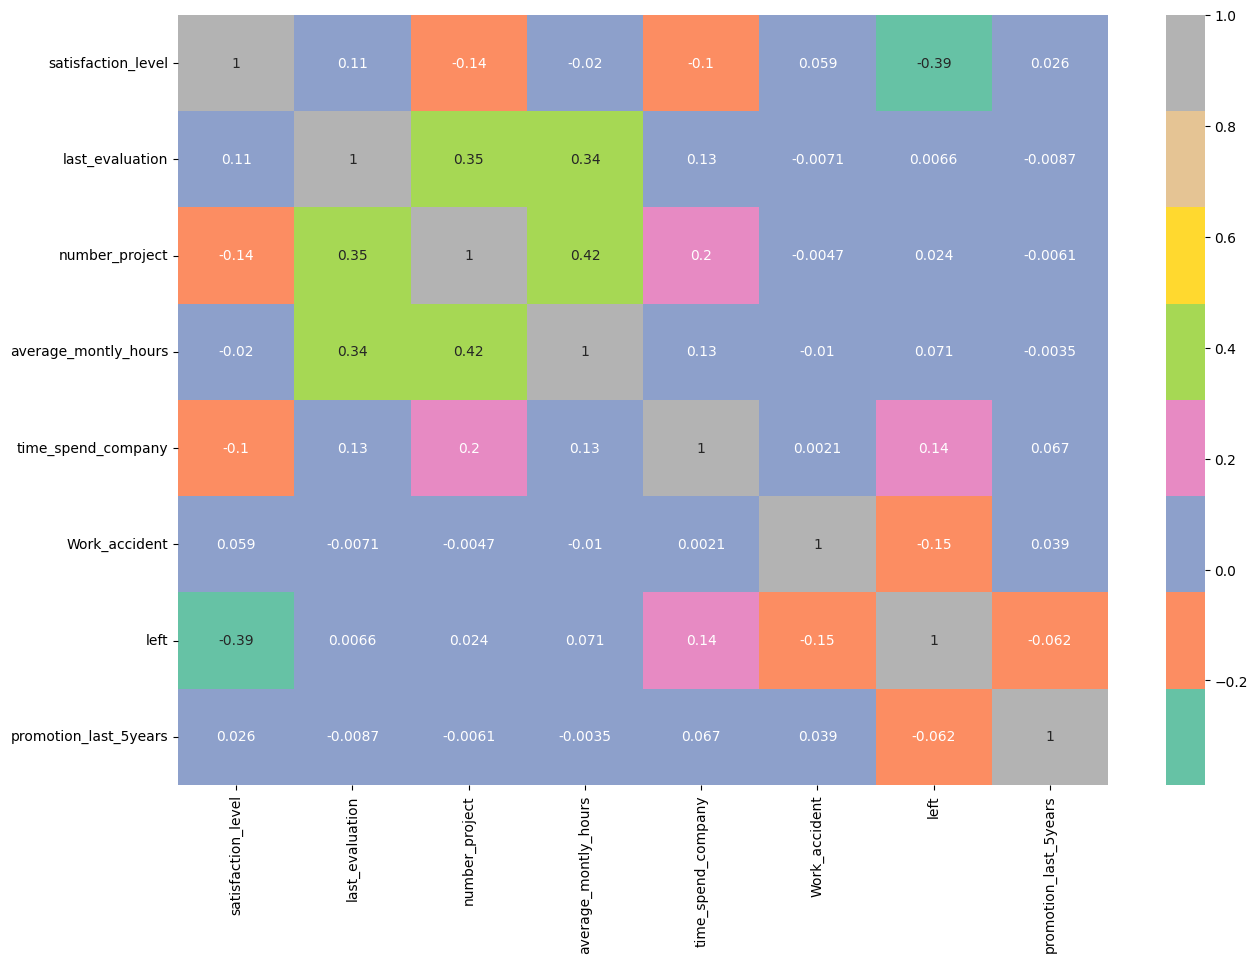

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap="Set2")

## the correlation map shows the biggest factor for leave is satisfaction level

In [ ]:
dataset[dataset.left == 1].sum()

satisfaction_level                                                 1571.59
last_evaluation                                                    2564.38
number_project                                                       13768
average_montly_hours                                                740694
time_spend_company                                                   13843
Work_accident                                                          169
left                                                                  3571
promotion_last_5years                                                   19
sales                    salessalessalessalessalessalessalessalessaless...
salary                   lowmediummediumlowlowlowlowlowlowlowlowlowlowl...
dtype: object

In [ ]:
dataset[dataset.left == 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [ ]:
dataset[dataset.left != 1].sum()

satisfaction_level                                                  7620.3
last_evaluation                                                    8176.43
number_project                                                       43274
average_montly_hours                                               2274860
time_spend_company                                                   38627
Work_accident                                                         2000
left                                                                     0
promotion_last_5years                                                  300
sales                    salessalessalessalessalessalessalessalessaless...
salary                   lowlowlowlowlowlowlowlowlowlowmediummediummedi...
dtype: object

In [ ]:
dataset[dataset.left != 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


## Total employee left count is 3571, stay count is 11428, 3 times as much. Between the 2 groups, satisfaction level, # of work_accident, and promotion_last_5years are significantly different, mean of time_spend_company is a 13% from the staying group. In general, people who had accidents tend to stay. People who are promoted tend to stay.

## next we explore the relationship between salary and left status

In [ ]:
dataset.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['salary_encoded'] = le.fit_transform(dataset['salary'])

In [ ]:
dataset.shape

(14999, 11)

In [ ]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [ ]:
dataset[dataset.left == 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,1.345842
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,0.521763
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,1.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,1.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,2.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,2.000000


In [ ]:
dataset[dataset.left != 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251,1.347742
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889,0.654973
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000,1.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000,1.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000,2.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000,2.000000


## We find mean salary are very close in group 'left' and 'stay'. Which makes sense because evaluation score is also very close between the 2 groups.

<AxesSubplot:>

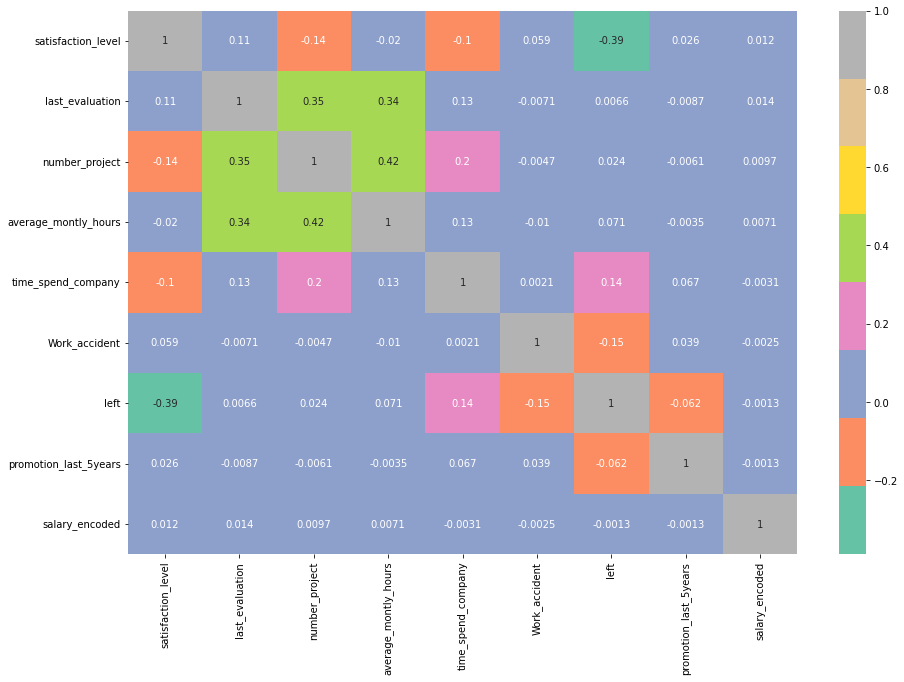

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap="Set2")

## next we explore the sales column

In [ ]:
dataset.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
dataset.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
dataset.groupby('left').sales.value_counts()

left  sales      
0     sales          3126
      technical      2023
      support        1674
      IT              954
      product_mng     704
      RandD           666
      marketing       655
      accounting      563
      management      539
      hr              524
1     sales          1014
      technical       697
      support         555
      IT              273
      hr              215
      accounting      204
      marketing       203
      product_mng     198
      RandD           121
      management       91
Name: sales, dtype: int64

In [ ]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_encoded'],
      dtype='object')

In [ ]:
left_to_plot = dataset[dataset.left == 1]
stay_to_plot = dataset[dataset.left != 1]

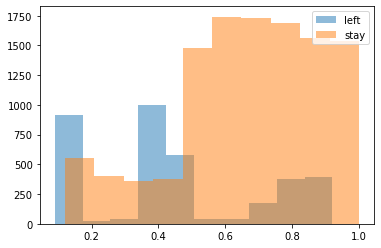

In [ ]:
plt.hist(left_to_plot.satisfaction_level, alpha=0.5, label='left')
plt.hist(stay_to_plot.satisfaction_level, alpha=0.5, label='stay')
plt.legend(loc='upper right')
plt.show()

In [ ]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_encoded'],
      dtype='object')

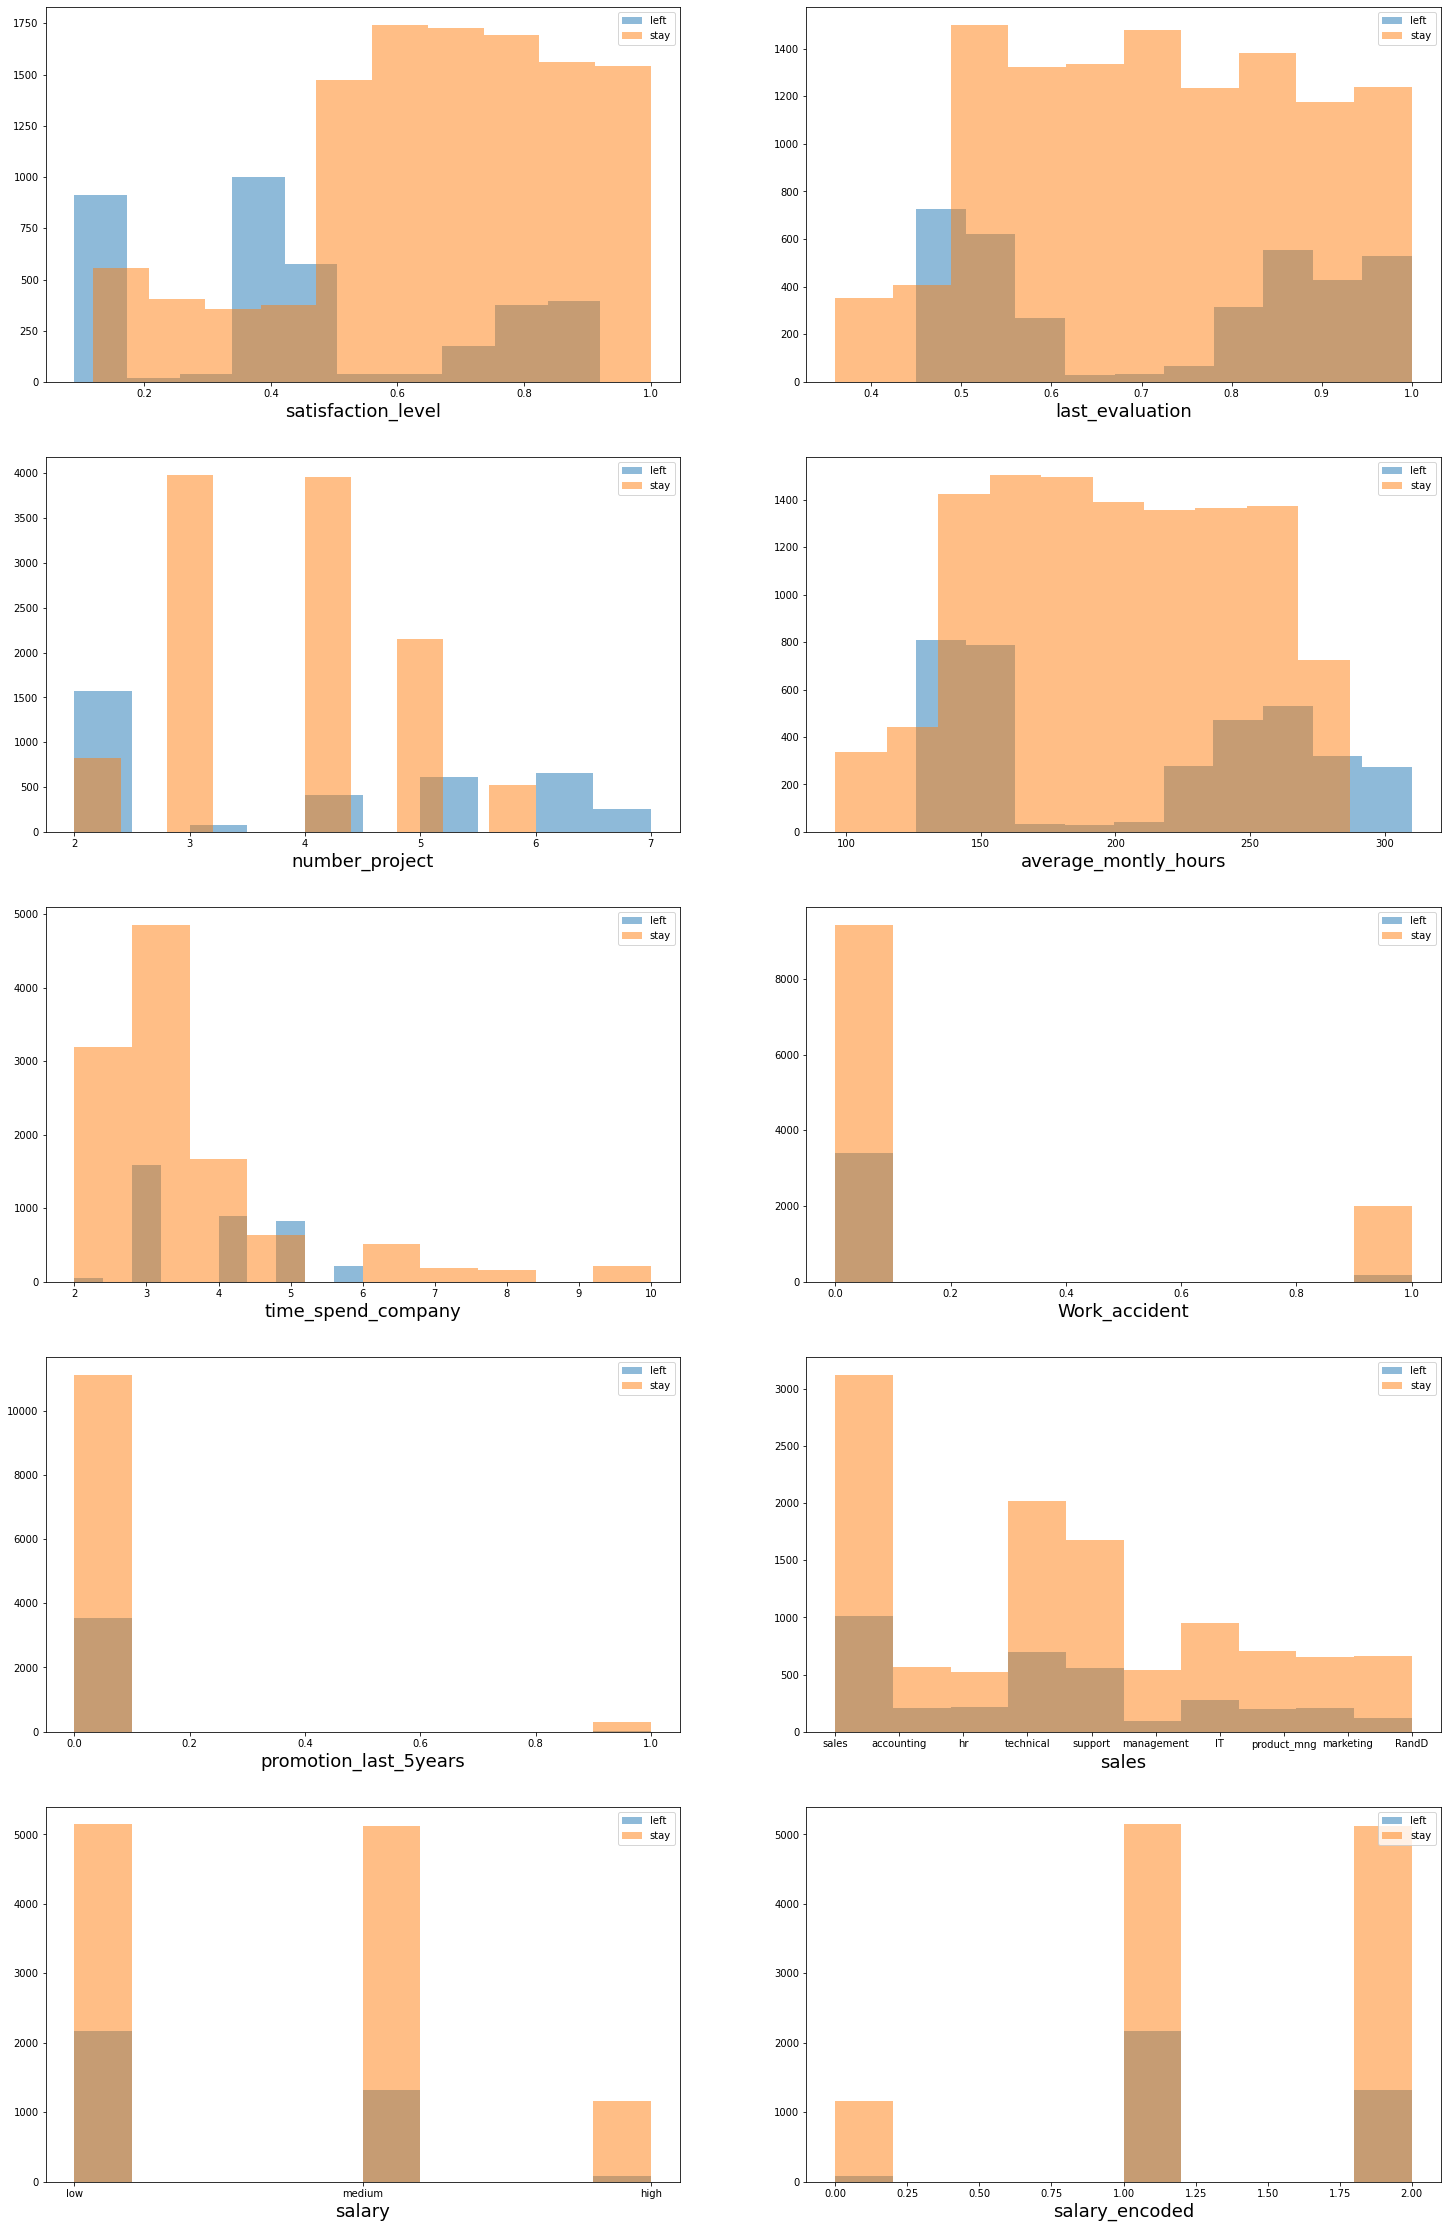

In [ ]:
#fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
#df = dataset.iloc[:,0:11]
df = dataset.drop('left', axis=1)
plt.figure(figsize=(25,40))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5,2,i)
    plt.hist(left_to_plot[column], alpha=0.5, label='left')
    plt.hist(stay_to_plot[column], alpha=0.5, label='stay')
    plt.legend(loc='upper right')
    plt.xlabel(column,fontsize=18)


## running the comparison graph shows some hints: 1) satisfaction level tends to be higher among people who stays. 2) average monthly hour tends to be on the longer side for people who left. 3) work accident ratio is much higher among people who stay 4) promotion ratio is much higher for people who stay 5) high salary ratio is much higher for people who stay. 6) Last evaluation score shows for people left the company, score is clustered on the two sides, mThe salary encoded part shows a high percentage of left people are having a high salary, which doesn't match the categorical salary data graph.

In [ ]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_encoded'],
      dtype='object')

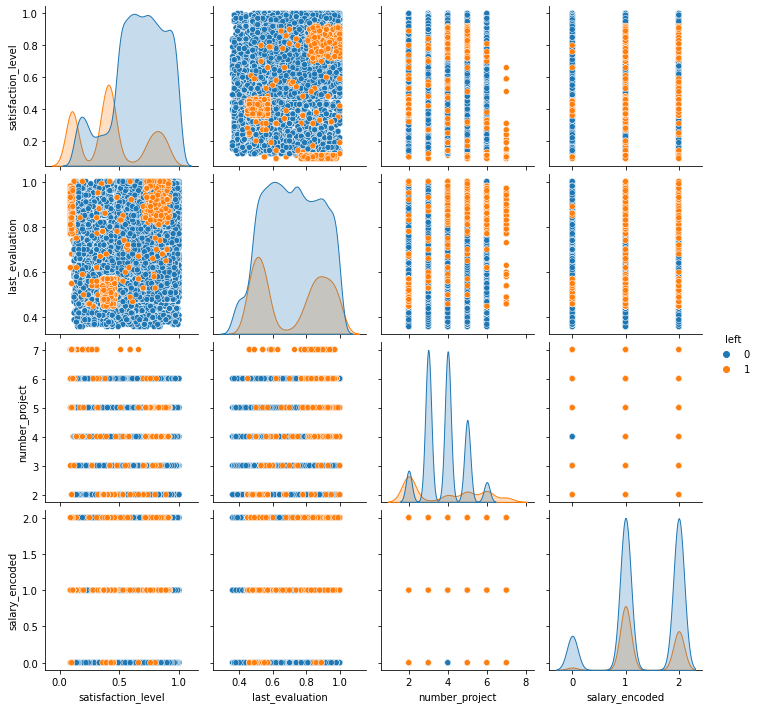

In [ ]:
sns.pairplot(dataset,hue='left', vars=['satisfaction_level','last_evaluation','number_project','salary_encoded']) #hue for dependant variables

## check result generated from salary encoded whether insync with original sarary freqencey

In [ ]:
left_to_plot.salary.value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [ ]:
left_to_plot.salary_encoded.value_counts()

1    2172
2    1317
0      82
Name: salary_encoded, dtype: int64

In [ ]:
stay_to_plot.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [ ]:
stay_to_plot.salary_encoded.value_counts()

1    5144
2    5129
0    1155
Name: salary_encoded, dtype: int64

## value counts shows no difference btw salary_encoded and salary. But the proportion shown on the salary_encoded graph looks inappropriate.  

In [ ]:
#X = dataset.iloc[:, [0,1]].values
X = left_to_plot.iloc[:,[0,1]].values
#X = column2_to_plot.iloc[:,[0,1]].values

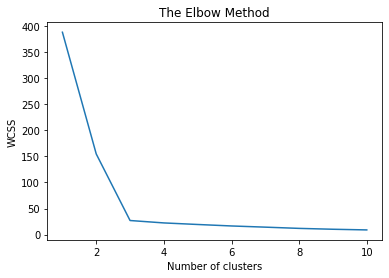

In [ ]:
#We create 10 clusters initailly
from sklearn.cluster import KMeans
wcss = []   #wcss is initialised as an empty list,which will be populated with the wcss of each cluster as the loop iterates
for i in range(1, 11):   #for 10 clusters,the upper bound is 11,as the range will include 1 less than the upper bound limit
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) #Fit method helps to run the loop/algo on the training set
    wcss.append(kmeans.inertia_)  #inertia is the parameter of the object kmeans which helps us generate wcss
plt.plot(range(1, 11), wcss)      #we start this line shifting indent to left,to confirm that we are out of loop
plt.title('The Elbow Method')     #range 1-11 shows what reflects in X axis,while wcss reflects in y axis
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()                       #THE OPTIMAL NUMBER OF CLUSTERS IS 3

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) #this line trains the kmeans model to identify 5 clusters,and creates a DV with
                                 #thse 5 clstrs,DV will be 0,1,2,3,4(5 clusters)

In [ ]:
print(y_kmeans)

[1 4 0 ... 1 0 1]


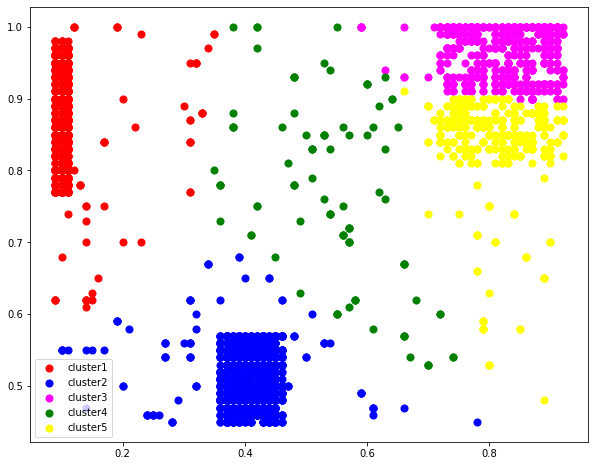

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='r',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='magenta',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='green',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='yellow',label='cluster5')
plt.legend()
plt.show()

## 3 clusters can be classified to: 1) high evaluation score, low satisfaction score. 2) low evaluation score, low-mid satisfaction score. 3) high satisfaction score, high evaluation score. Cluster 3 is hard to explain.

## Next we conduct a SMOTE analysis

In [ ]:
dataset.drop(columns='salary_encoded', axis=1, inplace=True)

In [ ]:
cata_data = dataset.iloc[:,[8,9]]

In [ ]:
cata_data.shape

(14999, 2)

In [ ]:
num_data = dataset.iloc[:,0:8]

In [ ]:
cata_data = pd.get_dummies(cata_data.astype(str),drop_first=True)

In [ ]:
cata_data.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
num_data = pd.concat([num_data, cata_data], axis=1)

In [ ]:
num_data.shape

(14999, 19)

In [ ]:
# Training and Test data
X = num_data.drop(columns='left',axis=1)
#X = num_data[['last_evaluation','number_project','average_montly_hours']]
y= num_data['left']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9323333333333333


col_0,0,1
left,,
0,2140,151
1,52,657


## We found the false prediction on stay is 151/(2140+151)=6.6%, false prediction on left is 52/(657+65)=7.2% fairly close.

In [ ]:
#pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
# just increase data in sample y, not X

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 9137, 1: 2862})
After SMOTE : Counter({0: 9137, 1: 9137})


In [ ]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.913


col_0,0,1
left,,
0,2049,242
1,19,690


## Result on false prediction on stay is getting higher. But false prediction on left decreases. total accuracy level also decreases.

## Next try the random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9926666666666667
Precision: 0.9900142653352354
Recall: 0.9788434414668548
F1 Score: 0.9843971631205675


## The above simple random forest test was done in retrospect. It shows even without using 5-fold, random forest show accurate result.

## Conducting Kfold analysis, with K=5

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression


In [ ]:
# Create a KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=123)
#X, y = make_classification(n_samples=1000, n_features=10, random_state=123)

# Create a logistic regression model
model = LogisticRegression()


In [ ]:
y.shape

(14999,)

In [ ]:
X.shape

(14999, 18)

In [ ]:
# - Compare classification algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
#minkowski appears by deafault in KNN. if p=2 then it implies we are using the euclidean distance
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale'))) #set gamma>0
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
for name, model in classification_models:
  kfold = KFold(n_splits=5, random_state=(7), shuffle=(True))
  result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))


Logistic Regression: Mean Accuracy = 79.01% - SD Accuracy = 0.32%
K Nearest Neighbor: Mean Accuracy = 93.56% - SD Accuracy = 0.42%
Kernel SVM: Mean Accuracy = 78.15% - SD Accuracy = 0.54%
Naive Bayes: Mean Accuracy = 72.93% - SD Accuracy = 1.13%
Decision Tree: Mean Accuracy = 98.00% - SD Accuracy = 0.18%
Random Forest: Mean Accuracy = 99.07% - SD Accuracy = 0.14%


## Random forest seems to be the most accurate. Show the confusion matrix for random forest model

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross-validation to obtain predicted labels
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Calculate and print confusion matrix
cm = confusion_matrix(y, y_pred)
print("confusion matrix by Random Forest")
print(cm)

confusion matrix by Random Forest
[[11405    23]
 [  110  3461]]


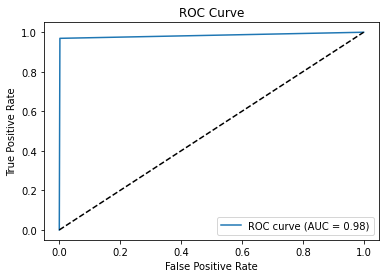

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Compute the AUC
auc = roc_auc_score(y, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest combined with 5-fold cross validation shows a much lower False Negative rate: 23/(11405+23)=0.2%, False Positive rate: 110/(110+3461)=3.1%.

In [ ]:
# Create a logistic regression classifier
clf = LogisticRegression(random_state=42)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross-validation to obtain predicted labels
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Calculate and print confusion matrix
cm = confusion_matrix(y, y_pred)
print("confusion matrix by LogisticRegression")
print(cm)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


confusion matrix by LogisticRegression
[[10602   826]
 [ 2139  1432]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


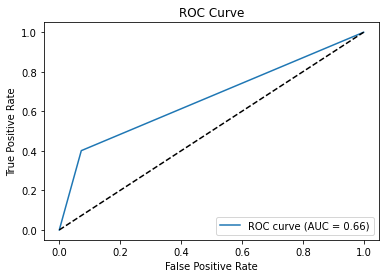

In [ ]:
#from sklearn.metrics import roc_curve, roc_auc_score
# Compute the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Compute the AUC
auc = roc_auc_score(y, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic regression model show less good result.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross-validation to obtain predicted labels
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Calculate and print confusion matrix
cm = confusion_matrix(y, y_pred)
print("confusion matrix by GradientBooting")
print(cm)

confusion matrix by GradientBooting
[[11329    99]
 [  245  3326]]


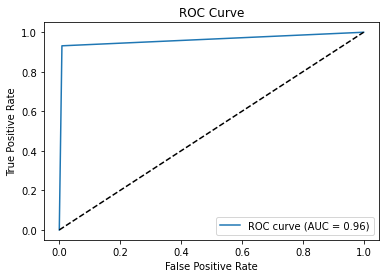

In [ ]:
#from sklearn.metrics import roc_curve, roc_auc_score
# Compute the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Compute the AUC
auc = roc_auc_score(y, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## propose stratgy for retention

In [ ]:
#num_data.drop(columns=['left']).dtypes
num_data.drop(columns=['Zone'], inplace=True)

KeyError: "['Zone'] not found in axis"

In [ ]:
# Load the best trained model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the probability of employee turnover in the test data
y_prob = model.predict_proba(num_data.drop(columns=['left']))[:, 1]
#y_prob = model.predict_proba(num_data)[:, 1]

# Categorize employees into four zones
bins = [0, 0.2, 0.6, 0.8, 1]
labels = ['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 'Moderate Risk Zone (Orange)', 'High Risk Zone (Red)']
num_data['Zone'] = pd.cut(y_prob, bins=bins, labels=labels)

# Analyze each zone and suggest retention strategies
safe_zone = num_data[num_data['Zone'] == 'Safe Zone (Green)']
low_risk_zone = num_data[num_data['Zone'] == 'Low Risk Zone (Yellow)']
moderate_risk_zone = num_data[num_data['Zone'] == 'Moderate Risk Zone (Orange)']
high_risk_zone = num_data[num_data['Zone'] == 'High Risk Zone (Red)']

# Retention strategies
safe_zone_strategy = "Retain these employees by offering them more incentives, rewards, and opportunities for growth."
low_risk_zone_strategy = "Monitor these employees closely and provide training and development opportunities to keep them engaged and motivated."
moderate_risk_zone_strategy = "Identify the reasons for their moderate risk level and offer them solutions to address their concerns. Provide them with challenging assignments to keep them motivated."
high_risk_zone_strategy = "Focus on retaining these employees by providing personalized retention strategies. Offer them opportunities for career advancement, and address any concerns they might have. You may also want to consider offering them a retention bonus."

print("Safe Zone (Green):")
print(safe_zone_strategy)
print("Low Risk Zone (Yellow):")
print(low_risk_zone_strategy)
print("Moderate Risk Zone (Orange):")
print(moderate_risk_zone_strategy)
print("High Risk Zone (Red):")
print(high_risk_zone_strategy)

Safe Zone (Green):
Retain these employees by offering them more incentives, rewards, and opportunities for growth.
Low Risk Zone (Yellow):
Monitor these employees closely and provide training and development opportunities to keep them engaged and motivated.
Moderate Risk Zone (Orange):
Identify the reasons for their moderate risk level and offer them solutions to address their concerns. Provide them with challenging assignments to keep them motivated.
High Risk Zone (Red):
Focus on retaining these employees by providing personalized retention strategies. Offer them opportunities for career advancement, and address any concerns they might have. You may also want to consider offering them a retention bonus.


In [ ]:
num_data

NameError: name 'num_data' is not defined

In [ ]:
y_prob

array([0.90069699, 0.50238991, 0.81079167, ..., 0.89961453, 0.86479515,
       0.89961453])

In [ ]:
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.916


col_0,0,1
left,,
0,2057,234
1,18,691


In [ ]:
print(kf.split(X))

<generator object _BaseKFold.split at 0x7fc7302a9e50>


In [ ]:
for train_idx, test_idx in kf.split(X):
    print(train_idx,test_idx)

[    0     1     2 ... 14996 14997 14998] [    7    10    12 ... 14974 14983 14985]
[    0     1     4 ... 14996 14997 14998] [    2     3     6 ... 14981 14984 14990]
[    1     2     3 ... 14993 14996 14998] [    0     4     9 ... 14994 14995 14997]
[    0     2     3 ... 14995 14996 14997] [    1     5    18 ... 14992 14993 14998]
[    0     1     2 ... 14995 14997 14998] [   13    16    17 ... 14987 14991 14996]


In [ ]:
# Loop over the folds
for train_idx, test_idx in kf.split(X):
    # Get the training and testing data for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model on the training data
    model.fit(X_train, y_train)

KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,\n               11,\n            ...\n            14989, 14990, 14991, 14992, 14993, 14994, 14995, 14996, 14997,\n            14998],\n           dtype='int64', length=11999)] are in the [columns]"

In [ ]:
# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print(f"Fold score: {score:.2f}")

# Compute the average score across all folds
average_score = cross_val_score(model, X, y, cv=kf).mean()
print(f"Average score: {average_score:.2f}")